This notebook processes the UV-vis data from 9/8/24 (Batch 5) of Spincoated P3HT in DCB on PDMS.
There are two samples (S5 and S6)

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_polarized_UVvis(_df, bw=None, ylim=(0,1.05),title="", plot_transmittance = False):
    # Set up figure with 3 subplots for polarized and unpolarized UV-vis data
    fig, axs = plt.subplots(3, 1, figsize=(5, 10))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    if plot_transmittance:
        for i, column in enumerate([col for col in _df.columns if 'Wavelength' not in col]):
            print(column)
            _df[column] = AtoT(_df[column].values)
        _df
    # Generate colors for plotting
    colors = cm.Spectral([i / ((_df.shape[1] - 3)//3) for i in range((_df.shape[1] - 1)//3)])
    # Plot Vertical Absorbance (columns with 'H' wichic are parrallel to strain)
    for i, column in enumerate([col for col in _df.columns if 'H' in col and 'baseline' not in col]):
        axs[0].plot(_df['Wavelength'],_df[column], label=column, color=colors[i])

    # axs[0].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for ||-polarized light')
    axs[0].set_xlabel('Wavelength (nm)')
    axs[0].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[0].set_xlim(bw)
    axs[0].set_ylim(ylim)
    axs[0].legend(title='||-Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Horizontal Absorbance (columns with 'V' which are perp to strain)
    for i, column in enumerate([col for col in _df.columns if 'V' in col and 'baseline' not in col]):
        axs[1].plot(_df['Wavelength'],_df[column], label=column, color=colors[i])

    # axs[1].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for ⊥-polarized light')
    axs[1].set_xlabel('Wavelength (nm)')
    axs[1].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[1].set_xlim(bw)
    axs[1].set_ylim(ylim)
    axs[1].legend(title='⊥-Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Unpolarized Absorbance (columns without 'H' or 'V')
    for i, column in enumerate([col for col in _df.columns if 'H' not in col and 'V' not in col and 'Wavelength' not in col and 'baseline' not in col]):
        axs[2].plot(_df['Wavelength'], _df[column], label=column, color=colors[i])

    # axs[2].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for Unpolarized light')
    axs[2].set_xlabel('Wavelength (nm)')
    axs[2].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[2].set_xlim(bw)
    axs[2].set_ylim(ylim)
    axs[2].legend(title='Unpolarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    
    return fig,axs

In [149]:
def TtoA(T):
    return -np.log10(T) 
    
def AtoT(A):
    return 10**(-A)

In [150]:

# Load the CSV file into a pandas DataFrame, with metadata
sample_info = [
    {
        'file_path': 'Batch 5 Samples - Sample 5 Raw Data.csv',
        's_num': 5,
        'date_str': "2024-09-08",
        'method_str': "spincoated",
        'material_str': 'P3HT',
        'solvent_str': 'DCB'
    },
    {
        'file_path': 'Batch 5 Samples - Sample 6 Raw Data.csv',
        's_num': 6,
        'date_str': "2024-09-08",
        'method_str': "spincoated",
        'material_str': "P3HT",
        'solvent_str': 'DCB'
    }
]

i=1
file_path = sample_info[i]['file_path']
s_num = sample_info[i]['s_num']
date_str = sample_info[i]['date_str']
method_str = sample_info[i]['method_str']
material_str = sample_info[i]['material_str']
solvent_str = sample_info[i]['solvent_str']

print(f"File Path: {file_path}\n Sample Number: {s_num}\n Date: {date_str}\n Method: {method_str}")

# file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 5 Raw Data.csv'; s_num = 5; date_str = "2024-09-08"; method_str="spincoated"
# # file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv'; s_num = 6; date_str = "2024-09-08"; method_str="spincoated"

raw_df = pd.read_csv(file_path)

File Path: Batch 5 Samples - Sample 6 Raw Data.csv
 Sample Number: 6
 Date: 2024-09-08
 Method: spincoated


In [151]:
### load baseline data for polaizer  ####
h_file = "../baselines/Polarized Batch 4 0% Samples  - Baseline Horizontal.csv"
v_file = "../baselines/Polarized Batch 4 0% Samples  - Baseline Vertical.csv"

df_h = pd.read_csv(h_file)
df_v = pd.read_csv(v_file)

#add baseleine to df
raw_df['V_baseline'] = df_v['Average']
raw_df['H_baseline'] = df_h['Average']

raw_df

,Wavelength,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,...,30%H,30%V,40%,40%H,40%V,50%,50%H,50%V,V_baseline,H_baseline
0,300.0,0.433788,4.000000,4.000000,0.394925,4.000000,4.000000,0.413223,4.000000,4.000000,...,4.000000,4.000000,0.388122,4.000000,3.983489,0.389276,4.000000,4.000000,4.000000,4.000000
1,300.5,0.431662,4.000000,4.000000,0.392923,3.970814,4.000000,0.411178,4.000000,4.000000,...,4.000000,4.000000,0.386125,3.994737,3.994713,0.387221,4.000000,4.000000,3.973701,4.000000
2,301.0,0.429235,4.000000,4.000000,0.390655,3.994535,4.000000,0.408850,3.988463,4.000000,...,4.000000,4.000000,0.384006,4.000000,3.910665,0.385221,4.000000,4.000000,3.994414,3.992867
3,301.5,0.426603,3.988345,3.970443,0.388120,3.994535,4.000000,0.406354,4.000000,3.967144,...,3.961568,4.000000,0.382072,4.000000,3.947889,0.382982,4.000000,4.000000,3.980757,3.989014
4,302.0,0.423869,4.000000,3.957882,0.385657,4.000000,3.982980,0.403841,4.000000,4.000000,...,4.000000,4.000000,0.379584,4.000000,4.000000,0.380788,4.000000,4.000000,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.114587,0.186523,0.278575,0.106130,0.177678,0.269270,0.109067,0.181073,0.272261,...,0.179332,0.270136,0.106552,0.179977,0.269247,0.107526,0.181269,0.270606,0.165349,0.072880
1197,898.5,0.114585,0.186335,0.276814,0.106129,0.177485,0.267559,0.109018,0.180786,0.270555,...,0.178956,0.268486,0.106583,0.179411,0.267587,0.107543,0.180684,0.269052,0.163506,0.072257
1198,899.0,0.114699,0.185847,0.275167,0.106262,0.176976,0.266026,0.109107,0.180272,0.269082,...,0.178480,0.267099,0.106671,0.179022,0.266326,0.107642,0.180425,0.267970,0.161557,0.071873
1199,899.5,0.114711,0.185530,0.273863,0.106296,0.176663,0.264913,0.109118,0.180015,0.268090,...,0.178187,0.266163,0.106599,0.178752,0.265403,0.107643,0.180003,0.266969,0.159992,0.071622


Saved figure to Raw_Polarized_UVvis_S6_spincoated_P3HT_2024-09-08.pdf


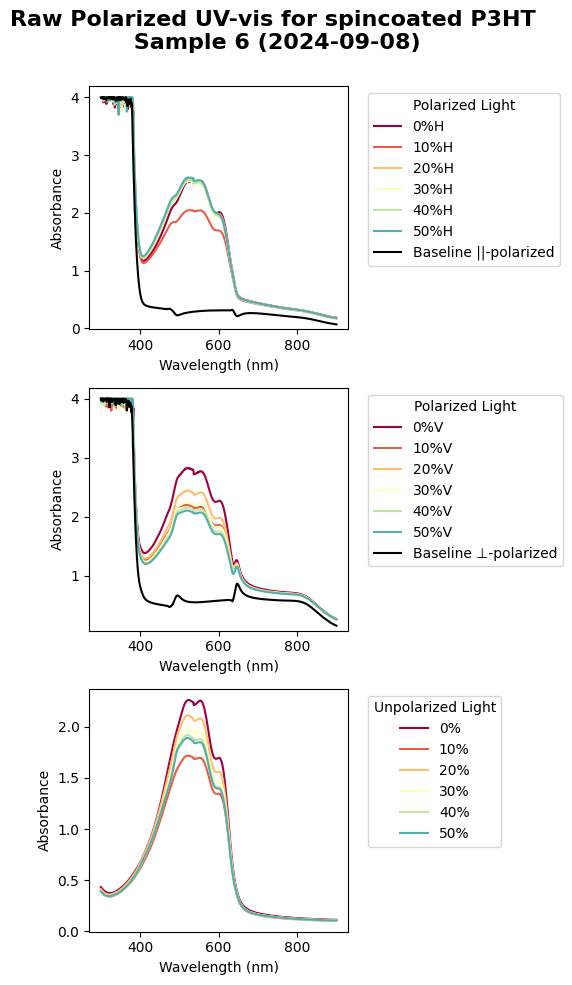

In [152]:
##### plotting the raw data #####
fig,axs = plot_polarized_UVvis(raw_df, bw=None, ylim=(None),title=f'Raw Polarized UV-vis for {method_str} {material_str}\n Sample {s_num} ({date_str})\n')
axs[0].plot(raw_df['Wavelength'], raw_df['H_baseline'], label="Baseline ||-polarized", color='k')
axs[1].plot(raw_df['Wavelength'], raw_df['V_baseline'], label="Baseline ⊥-polarized", color='k')
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

save_str = f"Raw_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.pdf"
fig.savefig(save_str, format='pdf')
print(f"Saved figure to {save_str}")

In [153]:
#### baseline correction ####
# formula = r"$A_{\text{corrected}} = A_{\text{raw}} - A_{\text{baseline}}$"

df_corrected = raw_df.copy()
for i, column in enumerate([col for col in df_corrected.columns if 'H' in col and 'baseline' not in col]):
    df_corrected[column] = raw_df[column].values - raw_df['H_baseline'].values

for i, column in enumerate([col for col in df_corrected.columns if 'V' in col and 'baseline' not in col]):
    df_corrected[column] = raw_df[column].values - raw_df['V_baseline'].values

df_normalized = df_corrected.copy

max0= max(df_corrected['0%'])
max0H = max(df_corrected['0%H'])
max0V = max(df_corrected['0%V'])

print("max0strain= " , max0V)


max0strain=  2.2636327


In [154]:
df_normalized = df_corrected.copy()

max0= max(df_corrected['0%'])
max0H = max(df_corrected['0%H'])
max0V = max(df_corrected['0%V'])

for i, column in enumerate([col for col in df_corrected.columns if 'H' in col and 'baseline' not in col]):
    df_normalized[column] = df_corrected[column].values / max0H

for i, column in enumerate([col for col in df_corrected.columns if 'V' in col and 'baseline' not in col]):
    df_normalized[column] = df_corrected[column].values / max0V

for i, column in enumerate([col for col in df_corrected.columns if 'V' not in col and 'H' not in col and 'baseline' not in col and 'Wavelength' not in col]):
    df_normalized[column] = df_corrected[column].values / max0

df_normalized

,Wavelength,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,...,30%H,30%V,40%,40%H,40%V,50%,50%H,50%V,V_baseline,H_baseline
0,300.0,0.191790,0.000000,0.000000,0.174608,0.000000,0.000000,0.182698,0.000000,0.000000,...,0.000000,0.000000,0.171600,0.000000,-0.007294,0.172110,0.000000,0.000000,4.000000,4.000000
1,300.5,0.190850,0.000000,0.011618,0.173723,-0.012882,0.011618,0.181794,0.000000,0.011618,...,0.000000,0.011618,0.170717,-0.002323,0.009282,0.171202,0.000000,0.011618,3.973701,4.000000
2,301.0,0.189777,0.003148,0.002468,0.172720,0.000736,0.002468,0.180764,-0.001944,0.002468,...,0.003148,0.002468,0.169780,0.003148,-0.036998,0.170317,0.003148,0.002468,3.994414,3.992867
3,301.5,0.188614,-0.000295,-0.004556,0.171599,0.002437,0.008501,0.179661,0.004849,-0.006014,...,-0.012114,0.008501,0.168925,0.004849,-0.014520,0.169327,0.004849,0.008501,3.980757,3.989014
4,302.0,0.187405,0.003185,-0.018606,0.170510,0.003185,-0.007519,0.178550,0.003185,0.000000,...,0.003185,0.000000,0.167825,0.003185,0.000000,0.168357,0.003185,0.000000,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.050662,0.050160,0.050019,0.046923,0.046256,0.045909,0.048222,0.047755,0.047230,...,0.046986,0.046291,0.047110,0.047271,0.045899,0.047540,0.047841,0.046499,0.165349,0.072880
1197,898.5,0.050661,0.050352,0.050056,0.046923,0.046446,0.045967,0.048200,0.047903,0.047291,...,0.047095,0.046377,0.047123,0.047296,0.045980,0.047548,0.047858,0.046627,0.163506,0.072257
1198,899.0,0.050712,0.050306,0.050189,0.046982,0.046391,0.046151,0.048239,0.047846,0.047501,...,0.047055,0.046625,0.047162,0.047294,0.046283,0.047592,0.047913,0.047010,0.161557,0.071873
1199,899.5,0.050717,0.050277,0.050305,0.046997,0.046363,0.046351,0.048244,0.047843,0.047754,...,0.047036,0.046903,0.047131,0.047285,0.046567,0.047592,0.047838,0.047259,0.159992,0.071622


Saved figure to Corrected_Polarized_UVvis_S6_spincoated_P3HT_2024-09-08.pdf


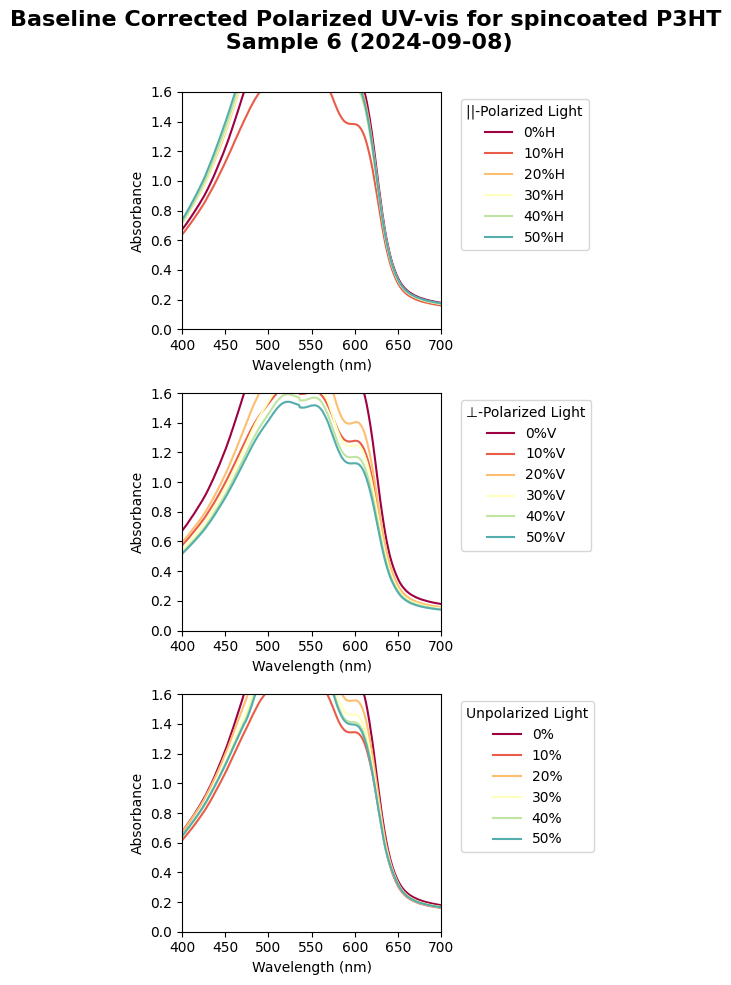

In [155]:
##### plotting final corected #####
fig,axs = plot_polarized_UVvis(df_corrected, title=f'Baseline Corrected Polarized UV-vis for {method_str} {material_str}\n Sample {s_num} ({date_str})\n', bw=(400,700), ylim = (0,1.6), plot_transmittance=False)
# axs[0].text(0.75, 0.9, formula, fontsize=12, ha='center', va='center', transform=axs[0].transAxes)

# #plot overides
# axs[0].plot(df_corrected['Wavelength'], df_corrected['H_baseline'], label="Baseline ||-polarized", color='k')
# axs[1].plot(df_corrected['Wavelength'], df_corrected['V_baseline'], label="Baseline ⊥-polarized", color='k')
# axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
# axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
# axs[2].set_ylim((.4,.8))

save_str = f"Corrected_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.pdf"
fig.savefig(save_str, format='pdf')
print(f"Saved figure to {save_str}")

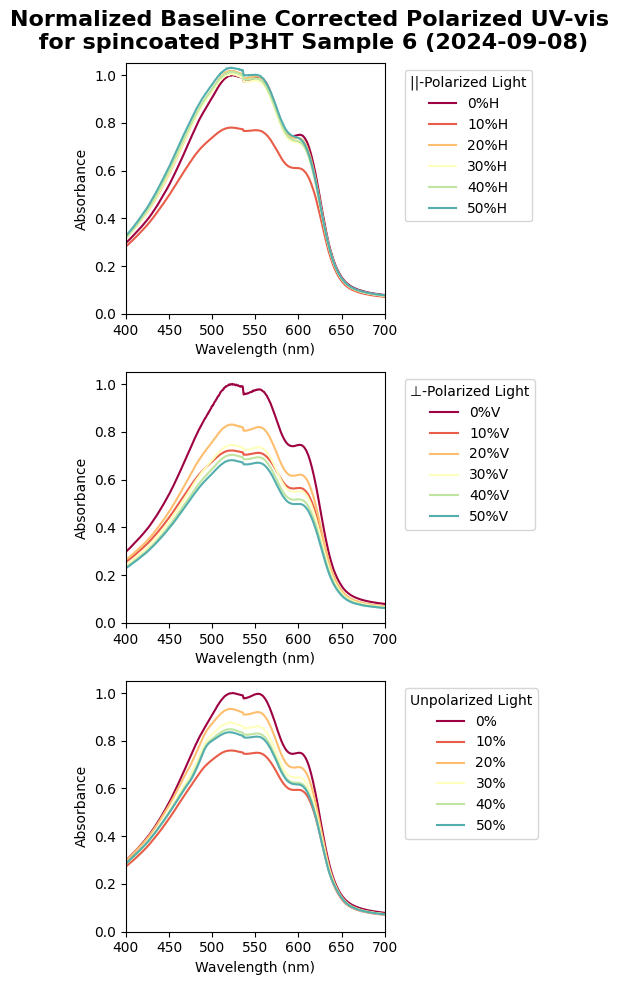

In [156]:
fig,axs = plot_polarized_UVvis(df_normalized, title=f'Normalized Baseline Corrected Polarized UV-vis\n for {method_str} {material_str} Sample {s_num} ({date_str})', bw=(400,700), ylim = (0,1.05), plot_transmittance=False)


In [157]:
#Save corrected data
data_save_str = f"Corrected_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.csv"
df_corrected.to_csv(data_save_str, index=False)

### Calculate the absorbance ratio

In [158]:
#load from file for modularity
peak00 = 606
peak01 = 557

df_absorbance_ratios = pd.DataFrame()

for i, sample in enumerate(sample_info):
    print(sample)
    data_save_str = f"Corrected_Polarized_UVvis_S{sample['s_num']}_{sample['method_str']}_P3HT_{sample['date_str']}.csv"
    df_corrected = pd.read_csv(data_save_str)

    # Get absorbance data for the peaks
    A00 = df_corrected[df_corrected['Wavelength'] == peak00]
    A01 = df_corrected[df_corrected['Wavelength'] == peak01]

    data_cols = [col for col in df_corrected.columns if col not in ['Wavelength', 'V_baseline', 'H_baseline']]    # Filter out the unwanted columns
    absorbance_ratio = A00[data_cols].values / A01[data_cols].values     # Calculate the absorbance ratio

    df_absorbance_ratio = pd.DataFrame(absorbance_ratio, columns=data_cols)
    df_absorbance_ratios = pd.concat([df_absorbance_ratios, df_absorbance_ratio], ignore_index=True)

    H_columns_str = [col for col in A00.columns if 'H' in col and 'baseline' not in col]
    V_columns_str = [col for col in A00.columns if 'V' in col and 'baseline' not in col]

    # print(H_columns_str, V_columns_str)
    # df.dichroic_ratio = A00[H_columns_str].values / A00[V_columns_str].values
    # df.dichroic_ratio

{'file_path': 'Batch 5 Samples - Sample 5 Raw Data.csv', 's_num': 5, 'date_str': '2024-09-08', 'method_str': 'spincoated', 'material_str': 'P3HT', 'solvent_str': 'DCB'}
{'file_path': 'Batch 5 Samples - Sample 6 Raw Data.csv', 's_num': 6, 'date_str': '2024-09-08', 'method_str': 'spincoated', 'material_str': 'P3HT', 'solvent_str': 'DCB'}


In [159]:
absorbance_ratios_data_save_str = f"Absorbance_Ratios_UVvis_S{s_num}_{method_str}_{solvent_str}_P3HT_{date_str}.csv"
df_absorbance_ratios.to_csv(absorbance_ratios_data_save_str, index=False)
print(f"Saved to Absorbance Ratio data to {absorbance_ratios_data_save_str}")

Saved to Absorbance Ratio data to Absorbance_Ratios_UVvis_S6_spincoated_DCB_P3HT_2024-09-08.csv


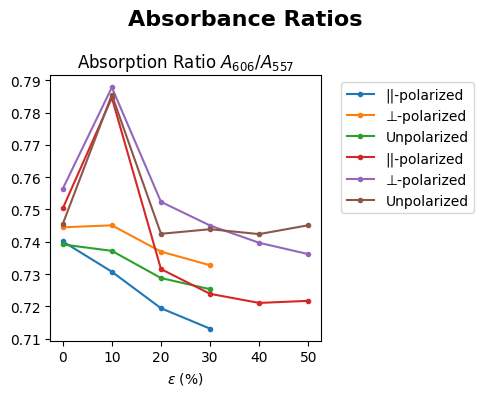

In [160]:
fig, axs = plt.subplots(1, 1, figsize=(5, 4))
fig.suptitle("Absorbance Ratios", fontsize=16, fontweight='bold')

# df_absorbance_ratios = df_absorbance_ratios.mean(axis=0).to_frame().T

for i, row in df_absorbance_ratios.iterrows():
    H_columns_str = [col for col in df_absorbance_ratios.columns if 'H' in col and 'baseline' not in col]
    H_percents = [float(s.strip('%HV')) for s in H_columns_str]

    V_columns_str = [col for col in df_absorbance_ratios.columns if 'V' in col and 'baseline' not in col]
    V_percents = [float(s.strip('%HV')) for s in V_columns_str]

    unpolarized_columns_str = [col for col in df_corrected.columns if 'V' not in col and 'H' not in col and 'baseline' not in col and 'Wavelength' not in col]
    unpolaraized_percents = [float(s.strip('%HV')) for s in H_columns_str]

    axs.plot(H_percents, row[H_columns_str], '.-',label=f"||-polarized")
    axs.plot(V_percents, row[V_columns_str], '.-', label=f"⊥-polarized")
    axs.plot(unpolaraized_percents, row[unpolarized_columns_str], '.-',label=f"Unpolarized")
    
axs.set_title(rf'Absorption Ratio $A_{{606}}/A_{{557}}$')
axs.set_xlabel(r'$\epsilon$ (%)')
axs.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()

In [161]:
S1_airbrushed_Toluene_P3HT_filepath= '/Users/adrian/Documents/UV-vis/Carlos_P3HT_9-10-24/Absorbance_Ratios_UVvis_S1_airbrushed_Toluene_P3HT_2024-9-10.csv'


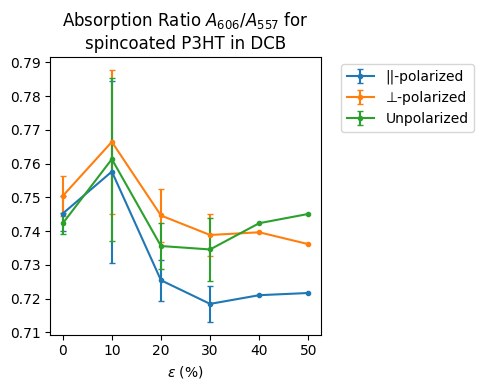

In [164]:
# Compute the mean and standard error for each column
mean_values = df_absorbance_ratios.mean()
standard_error = df_absorbance_ratios.sem()

H_columns_str = [col for col in df_absorbance_ratios.columns if 'H' in col and 'baseline' not in col]
H_percents = [float(s.strip('%HV')) for s in H_columns_str]

V_columns_str = [col for col in df_absorbance_ratios.columns if 'V' in col and 'baseline' not in col]
V_percents = [float(s.strip('%HV')) for s in V_columns_str]

unpolarized_columns_str = [col for col in df_corrected.columns if 'V' not in col and 'H' not in col and 'baseline' not in col and 'Wavelength' not in col]
unpolaraized_percents = [float(s.strip('%HV')) for s in H_columns_str]

# Plot the mean values with error bars for standard error
fig, axs = plt.subplots(1, 1, figsize=(5, 4))
axs.errorbar(H_percents, mean_values[H_columns_str], yerr=standard_error[H_columns_str], fmt='.-', label='||-polarized', capsize=2, capthick=1)
axs.errorbar(V_percents, mean_values[V_columns_str], yerr=standard_error[V_columns_str], fmt='.-', label='⊥-polarized',  capsize=2, capthick=1)
axs.errorbar(unpolaraized_percents, mean_values[unpolarized_columns_str], yerr=standard_error[unpolarized_columns_str], fmt='.-', label='Unpolarized', capsize=2, capthick=1)

# Customize plot
axs.set_title(f'Absorption Ratio $A_{{606}}/A_{{557}}$ for\n{method_str} {material_str} in {solvent_str}')
axs.set_xlabel(r'$\epsilon$ (%)')
axs.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
# axs.grid('on')

In [163]:
### Dichroic Ratios ###
#todo